
# Beautiful Soup Functions

Beautiful Soup is a powerful library in Python used for parsing HTML and XML documents and extracting data from them. Here are some commonly used functions and methods in Beautiful Soup:

## Creating a BeautifulSoup Object
- **`BeautifulSoup`**: This function is used to create a BeautifulSoup object from an HTML or XML document.
    ```python
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html_doc, 'html.parser')
    ```

## Searching the Parse Tree
- **`find`**: Finds the first tag that matches the given criteria.
    ```python
    tag = soup.find('a')
    ```

- **`find_all`**: Finds all tags that match the given criteria.
    ```python
    tags = soup.find_all('a')
    ```

- **`select`**: Uses CSS selectors to find elements.
    ```python
    elements = soup.select('div.content')
    ```

## Extracting Text and Attributes
- **`get_text`**: Extracts all the text from a tag.
    ```python
    text = tag.get_text()
    ```

- **`get`**: Retrieves the value of an attribute for a tag.
    ```python
    href = tag.get('href')
    ```

- **`attrs`**: Accesses all attributes of a tag.
    ```python
    attributes = tag.attrs
    ```

## Navigating the Parse Tree
- **`contents`**: Retrieves the children of a tag as a list.
    ```python
    children = tag.contents
    ```

- **`children`**: Similar to `contents`, but returns a generator.
    ```python
    for child in tag.children:
        print(child)
    ```

- **`descendants`**: Iterates over all children and their children recursively.
    ```python
    for descendant in tag.descendants:
        print(descendant)
    ```

- **`parent`**: Retrieves the parent of a tag.
    ```python
    parent = tag.parent
    ```

- **`parents`**: Retrieves all parents of a tag.
    ```python
    for parent in tag.parents:
        print(parent)
    ```

- **`next_sibling`**: Retrieves the next sibling of a tag.
    ```python
    next_sibling = tag.next_sibling
    ```

- **`previous_sibling`**: Retrieves the previous sibling of a tag.
    ```python
    previous_sibling = tag.previous_sibling
    ```

- **`next_element`**: Retrieves the next element in the document, in the order it appears.
    ```python
    next_element = tag.next_element
    ```

- **`previous_element`**: Retrieves the previous element in the document, in the order it appears.
    ```python
    previous_element = tag.previous_element
    ```

## Modifying the Parse Tree
- **`decompose`**: Removes a tag from the tree.
    ```python
    tag.decompose()
    ```

- **`clear`**: Removes all the contents of a tag.
    ```python
    tag.clear()
    ```

- **`insert`**: Inserts a new tag or string into a tag at a specific position.
    ```python
    new_tag = soup.new_tag('a', href='http://example.com')
    tag.insert(1, new_tag)
    ```

- **`append`**: Appends a new tag or string to the end of a tag’s contents.
    ```python
    tag.append(new_tag)
    ```

## Finding Relatives
- **`find_parent`**: Finds the first parent tag that matches the given criteria.
    ```python
    parent = tag.find_parent('div')
    ```

- **`find_parents`**: Finds all parent tags that match the given criteria.
    ```python
    parents = tag.find_parents('div')
    ```

- **`find_next_sibling`**: Finds the next sibling tag that matches the given criteria.
    ```python
    next_sibling = tag.find_next_sibling('a')
    ```

- **`find_next_siblings`**: Finds all next sibling tags that match the given criteria.
    ```python
    next_siblings = tag.find_next_siblings('a')
    ```

- **`find_previous_sibling`**: Finds the previous sibling tag that matches the given criteria.
    ```python
    previous_sibling = tag.find_previous_sibling('a')
    ```

- **`find_previous_siblings`**: Finds all previous sibling tags that match the given criteria.
    ```python
    previous_siblings = tag.find_previous_siblings('a')
    ```

- **`find_next`**: Finds the next element that matches the given criteria.
    ```python
    next_element = tag.find_next('a')
    ```

- **`find_all_next`**: Finds all elements that match the given criteria, after the current element.
    ```python
    all_next_elements = tag.find_all_next('a')
    ```

- **`find_previous`**: Finds the previous element that matches the given criteria.
    ```python
    previous_element = tag.find_previous('a')
    ```

- **`find_all_previous`**: Finds all elements that match the given criteria, before the current element.
    ```python
    all_previous_elements = tag.find_all_previous('a')
    ```

These functions and methods should cover most of the common tasks you would perform with Beautiful Soup. For more advanced usage, refer to the [official Beautiful Soup documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/).


In [2]:
from urllib.request import urlopen
from urllib.request import HTTPError
from urllib.request import URLError
from bs4 import BeautifulSoup

In [10]:
# lets suppose this is a sample string
doc = """
<<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Sample Document</title>
</head>
<body>
    <table>
        <tr><td>Table 1, Row 1</td></tr>
    </table>
    <table>
        <tr><td>Table 2, Row 1</td></tr>
    </table>
    <table>
        <tr><td>Table 3, Row 1</td></tr>
    </table>
    <table>
        <tr><td>Table 4, Row 1</td></tr>
    </table>
    <table>
        <tr><td>Table 5, Row 1</td></tr>
        <tr><td>Table 5, Row 2</td></tr>
        <tr>
            <td>
                <div>Div 1 in Table 5, Row 3</div>
                <div>
                    <a href="https://example.com">Example Link</a>
                </div>
                <div>Div 3 in Table 5, Row 3</div>
            </td>
        </tr>
    </table>
</body>
</html>
"""

In [11]:
# parse using soup constructor
parse_html = BeautifulSoup(doc, 'html.parser')

# it uses 0 based indexing so dont get confused
parse_html.find_all('table')[4].find_all('tr')[2].find('td').find_all('div')[1].find('a')

<a href="https://example.com">Example Link</a>

### Problem here ? 

- That doesn’t look so great. In addition to the aesthetics of the line, even the slightest change to the website by a site administrator might break your
web scraper altogether.

- What if the site’s web developer decides to add another table or another col
umn of data? What if the developer adds another component (with a few div tags) to the top of the page? The preceding line is precarious and depends on the structure of the site never changing.

### Solution ?

-  Nearly every website you encounter contains stylesheets. Although you might think that a layer of styling on websites that is designed specifically for browser and human interpretation might be a bad thing, the advent of `CSS is a boon for web scrapers`. CSS relies on the differentiation of HTML elements that might otherwise have the exact same markup in order to style them differently.


In [16]:
example = """
<span class = "red">It is Danger</span>
<span class = "white">It shows Peace</span>
""" 

parse_example = BeautifulSoup(example,'html.parser')

print(f"Parsing Red class : {parse_example.find('span', {'class' : 'red'})}")
print(f"Parsing White class : {parse_example.find('span', {'class' : 'white'})}")


# you can also write it as 
print(f"Parsing Red class : {parse_example.find(class_='red')}")
print(f"Parsing white class : {parse_example.find(class_='white')}")


Parsing Red class : <span class="red">It is Danger</span>
Parsing White class : <span class="white">It shows Peace</span>
Parsing Red class : <span class="red">It is Danger</span>
Parsing white class : <span class="white">It shows Peace</span>


In [17]:
# function for parsing an url
def parse(url):
    try:
        html_doc = urlopen(url = url)
        return BeautifulSoup(html_doc.read(),'html.parser')
    except HTTPError as e :
        print(f"HTTP Error Occured. \n Code : {e.code} \n Error : {e.reason}")
    except URLError as e :
        print(f"URL Error Occurred: {e.reason}")
    except Exception as e :
        print(f"An unexpected error occurred: {e}")

In [20]:
url = "http://www.pythonscraping.com/pages/warandpeace.html"
data  = parse(url)
print(data.prettify())

<html>
 <head>
  <style>
   .green{
	color:#55ff55;
}
.red{
	color:#ff5555;
}
#text{
	width:50%;
}
  </style>
 </head>
 <body>
  <h1>
   War and Peace
  </h1>
  <h2>
   Chapter 1
  </h2>
  <div id="text">
   "
   <span class="red">
    Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news.
   </span>
   "
   <p>
   </p>
   It was in July, 1805, and the speaker was the well-known
   <span class="green">
    Anna
Pavlovna Scherer
   </span>
   , maid of honor and favorite of the
   <span class="green">
    Empress Marya
Fedorovna
   </span>
   . With these words she greeted
   <span 

- On this page, the lines spoken by characters in the story are in red. 

- The names of characters are in green. You can see the span tags, which reference the appropriate CSS classes, in the following sample of the page’s source code:

```html
 <span class="red">Heavens! what a virulent attack!</span> replied
 <span class="green">the prince</span>, not in the least disconcerted
 by this reception.
```

In [23]:
# suppose i had to get all the span tags with class green

for tag in data.find_all('span', {'class' : 'green'}):
    print(tag)

<span class="green">Anna
Pavlovna Scherer</span>
<span class="green">Empress Marya
Fedorovna</span>
<span class="green">Prince Vasili Kuragin</span>
<span class="green">Anna Pavlovna</span>
<span class="green">St. Petersburg</span>
<span class="green">the prince</span>
<span class="green">Anna Pavlovna</span>
<span class="green">Anna Pavlovna</span>
<span class="green">the prince</span>
<span class="green">the prince</span>
<span class="green">the prince</span>
<span class="green">Prince Vasili</span>
<span class="green">Anna Pavlovna</span>
<span class="green">Anna Pavlovna</span>
<span class="green">the prince</span>
<span class="green">Wintzingerode</span>
<span class="green">King of Prussia</span>
<span class="green">le Vicomte de Mortemart</span>
<span class="green">Montmorencys</span>
<span class="green">Rohans</span>
<span class="green">Abbe Morio</span>
<span class="green">the Emperor</span>
<span class="green">the prince</span>
<span class="green">Prince Vasili</span>
<span cl

In [24]:
# to get names of characters

for tag in data.find_all('span', {'class' : 'green'}):
    print(tag.get_text())

Anna
Pavlovna Scherer
Empress Marya
Fedorovna
Prince Vasili Kuragin
Anna Pavlovna
St. Petersburg
the prince
Anna Pavlovna
Anna Pavlovna
the prince
the prince
the prince
Prince Vasili
Anna Pavlovna
Anna Pavlovna
the prince
Wintzingerode
King of Prussia
le Vicomte de Mortemart
Montmorencys
Rohans
Abbe Morio
the Emperor
the prince
Prince Vasili
Dowager Empress Marya Fedorovna
the baron
Anna Pavlovna
the Empress
the Empress
Anna Pavlovna's
Her Majesty
Baron
Funke
The prince
Anna
Pavlovna
the Empress
The prince
Anatole
the prince
The prince
Anna
Pavlovna
Anna Pavlovna


In [28]:
# lines by chracter

for tag in data.find_all('span', {'class' : 'red'}):
    print(tag.get_text())

Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news.
If you have nothing better to do, Count [or Prince], and if the
prospect of spending an evening with a poor invalid is not too
terrible, I shall be very charmed to see you tonight between 7 and 10-
Annette Scherer.
Heavens! what a virulent attack!
First of all, dear friend, tell me how you are. Set your friend's
mind at rest,
Can one be well while suffering morally? Can one be calm in times
like these if one has any feeling?
You are
staying the whole evening, I hope?
And the fete at the English ambassador's? Today is Wednesday.

### Use of get_text() ?

- .get_text() strips all tags from the document you are working with and returns a Unicode string containing the text only. 

`For example, if you are working with a large block of text that contains many hyperlinks, paragraphs, and other tags, all those will be stripped away, and you’ll be left with a tagless block of text.`


- Keep in mind that it’s much easier to find what you’re looking for in a BeautifulSoup object than in a block of text. Call ing .get_text() should always be the last thing you do, immedi ately before you print, store, or manipulate your final data. In general, you should try to preserve the tag structure of a document as long as possible

## find() and Findall()

- The two functions are extremely similar, as evidenced by their definitions in the `BeautifulSoup documentation`:

    - find_all(tag, attributes, recursive, text, limit, keywords)
    - find(tag, attributes, recursive, text, keywords)



In [29]:
# using above data for illustration

print(data.find_all(['h1','p','span','div']))

[<h1>War and Peace</h1>, <div id="text">
"<span class="red">Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news.</span>"
<p></p>
It was in July, 1805, and the speaker was the well-known <span class="green">Anna
Pavlovna Scherer</span>, maid of honor and favorite of the <span class="green">Empress Marya
Fedorovna</span>. With these words she greeted <span class="green">Prince Vasili Kuragin</span>, a man
of high rank and importance, who was the first to arrive at her
reception. <span class="green">Anna Pavlovna</span> had had a cough for some days. She was, as
she said, suffering 

In [38]:
print(data.find('span'))

<span class="red">Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news.</span>


In [45]:
# also find requred data by peice of text

print(len(data.find_all(text = "the prince")))

7


C:\Users\ujjwa\AppData\Local\Temp\ipykernel_3460\4177973663.py:3: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  print(len(data.find_all(text = "the prince")))


In [49]:
# find by class and id

print(data.find_all(id = 'text'))

[<div id="text">
"<span class="red">Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news.</span>"
<p></p>
It was in July, 1805, and the speaker was the well-known <span class="green">Anna
Pavlovna Scherer</span>, maid of honor and favorite of the <span class="green">Empress Marya
Fedorovna</span>. With these words she greeted <span class="green">Prince Vasili Kuragin</span>, a man
of high rank and importance, who was the first to arrive at her
reception. <span class="green">Anna Pavlovna</span> had had a cough for some days. She was, as
she said, suffering from la grippe; grippe b

## NAVIGATING TREES

- LINK : http://www.pythonscraping.com/pages/page3.html

- The find_all function is responsible for finding tags based on their name and attributes. But what if you need to find a tag based on its location in a document?

    - That’s where tree navigation comes in handy. In Chapter 1, you looked at navigating a BeautifulSoup tree in a single direction


`Now let’s look at navigating up, across, and diagonally through HTML trees.`



In [50]:
shop_site_url = "http://www.pythonscraping.com/pages/page3.html"

parse_site = parse(shop_site_url)

In [51]:
# site structure

print(parse_site.prettify())

<html>
 <head>
  <style>
   img{
	width:75px;
}
table{
	width:50%;
}
td{
	margin:10px;
	padding:10px;
}
.wrapper{
	width:800px;
}
.excitingNote{
	font-style:italic;
	font-weight:bold;
}
  </style>
 </head>
 <body>
  <div id="wrapper">
   <img src="../img/gifts/logo.jpg" style="float:left;"/>
   <h1>
    Totally Normal Gifts
   </h1>
   <div id="content">
    Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is
hand-curated by well-paid, free-range Tibetan monks.
    <p>
     We haven't figured out how to make online shopping carts yet, but you can send us a check to:
     <br/>
     123 Main St.
     <br/>
     Abuja, Nigeria
We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.
    </p>
   </div>
   <table id="giftList">
    <tr>
     <th>
      Item Title
     </th>
     <th>
      Description
     </th>
     <th>
      Cost
     </th>
     <th>
      Image
     </th>
   

- Things to remember
    
    -  There is a distinction drawn between children and descendants: much like in a human family tree, children are always exactly one tag below a parent, whereas descendants can be at any level in the tree below a parent. For example, the tr tags are children of the table tag, whereas tr, th, td, img, and span are all descendants of the table tag (at least in our example page). All children are descendants, but not all descendants are children.

    - In general, BeautifulSoup functions always deal with the descendants of the current tag selected.

In [55]:
print(parse_site.find('table', {'id' : 'giftList'}).prettify())

<table id="giftList">
 <tr>
  <th>
   Item Title
  </th>
  <th>
   Description
  </th>
  <th>
   Cost
  </th>
  <th>
   Image
  </th>
 </tr>
 <tr class="gift" id="gift1">
  <td>
   Vegetable Basket
  </td>
  <td>
   This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
   <span class="excitingNote">
    Now with super-colorful bell peppers!
   </span>
  </td>
  <td>
   $15.00
  </td>
  <td>
   <img src="../img/gifts/img1.jpg"/>
  </td>
 </tr>
 <tr class="gift" id="gift2">
  <td>
   Russian Nesting Dolls
  </td>
  <td>
   Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"!
   <span class="excitingNote">
    8 entire dolls per set! Octuple the presents!
   </span>
  </td>
  <td>
   $10,000.52
  </td>
  <td>
   <img src="../img/gifts/img2.jpg"/>
  </td>
 </tr>
 <tr class="gift" id="gift3">
  <td>
   Fish Painting
  </td>
  <td>
   If something seems fishy about this painting, it's b

In [53]:
# to find only descendants that are children

for child in parse_site.find('table', {'id' : 'giftList'}).children:
    print(child)



<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>


<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>


<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>


<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>


In [54]:
# deal with descendants
for child in parse_site.find('table', {'id' : 'giftList'}).descendants:
    print(child)



<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>
<th>
Item Title
</th>

Item Title

<th>
Description
</th>

Description

<th>
Cost
</th>

Cost

<th>
Image
</th>

Image



<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>
<td>
Vegetable Basket
</td>

Vegetable Basket

<td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td>

This vegetable basket is the perfect gift for your health conscious (or overweight) friends!

<span class="excitingNote">Now with super-colorful bell peppers!</span>
Now with super-colorful bell peppers!


<td>
$15.00
</td>

$15.00

<td>
<img src="../img/gifts/img1.jpg"

In [57]:
# deal with siblings

for sibling in parse_site.find('table', {'id' : 'giftList'}).tr.next_siblings:
    print(sibling)



<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>


<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>


<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>
</td></tr>


<tr class="gift" id="gift4"><td>
Dead Parrot
</td><td>
This is an ex-parr

In [62]:
# dealing with parent

print(parse_site.find('img', {'src' : '../img/gifts/img1.jpg'}).parent.previous_sibling.get_text())


$15.00



explanation 

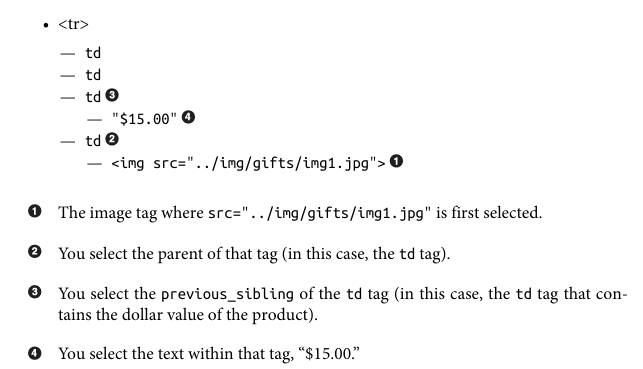



## Regular Expression

- Regular expressions are so called because they are used to identify regular strings; they can definitively say, “Yes, this string you’ve given me follows the rules, and I’ll return it,” or “This string does not follow the rules, and I’ll discard it.” This can be exceptionally handy for quickly scanning large documents to look for strings that look like phone numbers or email addresses.


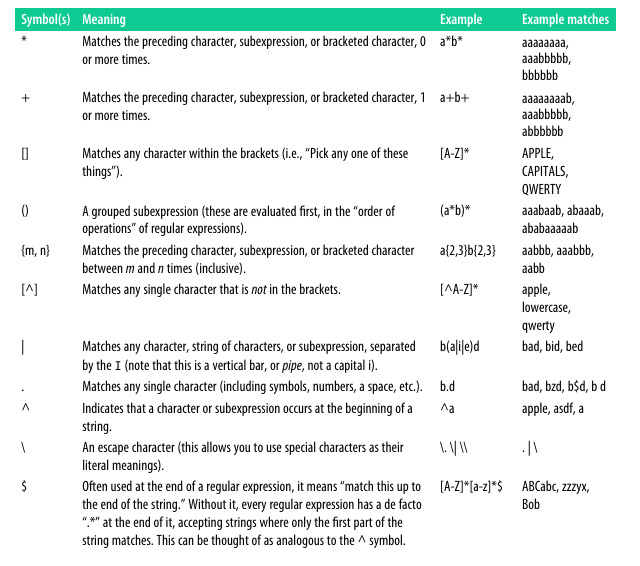

In [3]:
# regular expression with beautiful soup

from urllib.request import urlopen
from urllib.request import HTTPError,URLError
from bs4 import BeautifulSoup

def parse(url):
    try:
        doc = urlopen(url = url)
        return BeautifulSoup(doc.read(),'html.parser')
    except URLError as e:
        print(f"Url Error Occured. Reason : {e.reason}")
    except HTTPError as e:
        print(f"HTTP Error Occured. Code : {e.code} Reason: {e.reason}")
    except Exception as e:
        print(f"Something Else Occured : {e} ")

In [6]:
url = "http://www.pythonscraping.com/pages/page3.html"

doc = parse(url)

print(doc.prettify())

<html>
 <head>
  <style>
   img{
	width:75px;
}
table{
	width:50%;
}
td{
	margin:10px;
	padding:10px;
}
.wrapper{
	width:800px;
}
.excitingNote{
	font-style:italic;
	font-weight:bold;
}
  </style>
 </head>
 <body>
  <div id="wrapper">
   <img src="../img/gifts/logo.jpg" style="float:left;"/>
   <h1>
    Totally Normal Gifts
   </h1>
   <div id="content">
    Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is
hand-curated by well-paid, free-range Tibetan monks.
    <p>
     We haven't figured out how to make online shopping carts yet, but you can send us a check to:
     <br/>
     123 Main St.
     <br/>
     Abuja, Nigeria
We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.
    </p>
   </div>
   <table id="giftList">
    <tr>
     <th>
      Item Title
     </th>
     <th>
      Description
     </th>
     <th>
      Cost
     </th>
     <th>
      Image
     </th>
   

In [11]:
# if i have to grab all the image links

# first option

for tag in doc.find_all('img'):
    print(tag['src'])


# using regular exp
import re

print("Using Regular Expression : ")
for image in  doc.find_all('img' , { 'src' : re.compile('\.\.\/img\/gifts/img.*\.jpg')}):
    print(image['src'])

../img/gifts/logo.jpg
../img/gifts/img1.jpg
../img/gifts/img2.jpg
../img/gifts/img3.jpg
../img/gifts/img4.jpg
../img/gifts/img6.jpg
Using Regular Expression : 
../img/gifts/img1.jpg
../img/gifts/img2.jpg
../img/gifts/img3.jpg
../img/gifts/img4.jpg
../img/gifts/img6.jpg


In [15]:
#  accessing tags through lambdas

print(doc.find_all(lambda tag: tag.get_text() == "Or maybe he\'s only resting?"))

[<span class="excitingNote">Or maybe he's only resting?</span>]
